In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('age_gender.csv');

In [3]:
X = pd.DataFrame(df['pixels'].str.split(' ', 48*48-1, expand=True)).astype(float)
y = df['ethnicity']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [6]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
pca = PCA(0.95)
pca.fit(X_train)

PCA(n_components=0.95)

In [8]:
percent_variance = np.round(pca.explained_variance_ratio_*100, decimals =2)

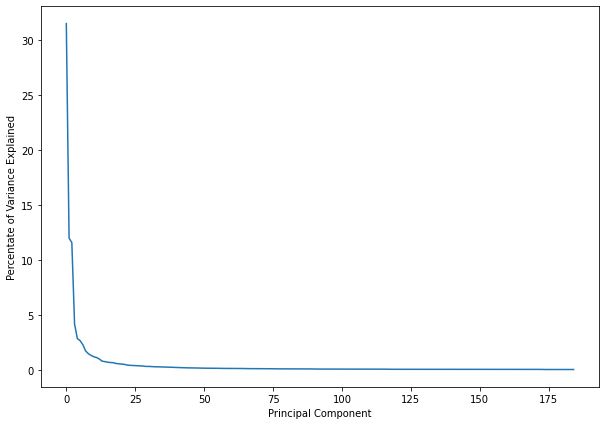

In [9]:
plt.figure(figsize=(10,7))
plt.plot(percent_variance)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.show()

In [10]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [11]:
# PCA components chosen
len(X_train)

15882

In [12]:
# Naive Bayes - Gaussian
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [13]:
# mean-accuracy
clf.score(X_test, y_test)

0.543781158123482

In [14]:
# Logistic Regression
clf = LogisticRegression(random_state=0, max_iter=500).fit(X_train, y_train)

In [15]:
# accuracy
clf.score(X_test, y_test)

0.7077847373130512